# Introduction

<img src = 'https://cdn.cloudflare.steamstatic.com/store/about/social-og.jpg' alt = 'Steam image'>


The video game industry has seen immense growth in recent years, with gaming revenue projected to reach over **$200 billion** globally by 2023 (according to Newzoo). As one of the largest distributors of PC-based games, Steam by Valve Corporation represents a significant share of this market. By analyzing data on over 40,000 games available on Steam, this project aims to uncover trends, patterns, and insights that could help gaming businesses make more informed decisions.

Specifically, understanding Steam gaming trends can help developers optimize game design and marketing based on consumer preferences. Analyzing factors like popular genres, pricing techniques, release timing, and review scores on Steam can inform decisions that align with consumer demand. Publishers and platform distributors like Steam can also utilize these insights to better target gaming promotions and sales.

Overall, exploring attributes of successful games on Steam through data analysis serves as an invaluable opportunity for gaming businesses to improve customer acquisition, retention, and satisfaction. The findings may also prompt new innovations that reshape products and experiences for the evolving gaming market. With the gaming industry projected to be worth over $300 billion by 2027 (according to Mordor Intelligence), data-driven insights will be crucial to stay ahead of the competition. This analysis aims to support that data-driven decision making using real-world Steam data.

# Process

## Ask
* Consider key stakeholders: The stakeholders are our gaming company client who needs these insights to make product decisions, my manager at the consulting firm overseeing the project, and myself as the data analyst.
* Clearly identify the problem we are trying to solve: Uncover insights from Steam data to inform optimal game development and promotion decisions for maximizing sales and engagement.

## Prepare

* Identify location: The [Steam Video Games dataset](https://www.kaggle.com/datasets/nikdavis/steam-store-games) is located on Kaggle.
* Explain organization: The data is structured as a CSV file with each row representing a game and columns for attributes like name, platform, genres, user ratings, etc.
* Discuss credibility and integrity: The data comes from a reputable platform, Kaggle, and has been uploaded and used by other analysts which adds credibility. I spot checked values across rows to ensure accuracy.
* Note problems: Some games are missing user rating data that I will need to address before analysis.
* Describe usefulness: The data contains key attributes like genre and ratings that will allow me to identify platform trends.

## Process

| Question                                            | Analysis                                              |
|-----------------------------------------------------|-------------------------------------------------------|
| How have Steam game prices changed over time?       | Look at price trends by year of release.              |
| Which publishers have the highest rated games?      | Analyze average user ratings by publisher.            |
| Do review scores differ by genre?                   | Compare average review scores for different game genres. |
| Do games with certain tags or descriptors tend to be more popular? | Analyze correlations between tags and user ratings/number of owners. |
| Which platforms are most common for Steam games?    | Look at frequency of different platforms like Windows, Mac, Linux. |
| "What factors are associated with longer average playtimes | Analyze Genre, Publisher Impact, User Reviews |

* Listing tools used: Python, Pandas, NumPy, Matplotlib, Seaborn
* Explaining tool selection: These libraries are best suited for cleaning, analyzing, and visualizing the dataset.
* Detailing integrity checks: I confirmed the column types and number of rows loaded in matched raw data. I checked for duplicates.
* Describing cleaning approach: I dropped rows with missing ratings, changed column types, handled duplicates, etc.

### Import external libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

steam_df = pd.read_csv('/kaggle/input/steam-store-games/steam.csv') 
steam_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


Many columns contain more than 1 value (platforms, categories, genres, steamspy_tags, owners). Before analyzing and processing the data, I will have to separate it into many different columns so that each column only contains 1 value.

### Preview the Information about the Dataset

In [3]:
steam_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [4]:
steam_df.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

### Check for duplicates and missing values

In [5]:
steam_df.duplicated().sum()

0

In [6]:
steam_df.isnull().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

Null developer and publisher can affect our "Which publishers have the highest rated games?" finding -> Drop null when calculate.

### Calculate the middle value of the 'owners' column and create a new column to store the mid value of number of owners

To derive a representative value for the 'owners' column, I calculated the midpoint between the lower and upper ownership bounds. This midpoint provides a more balanced estimate of the number of owners, which I will use for subsequent calculations.

In [48]:
def calculate_middle_owner(owners_str):
    lower, upper = map(int, owners_str.split("-"))
    return (upper - lower) / 2

steam_df['middle_owners'] = steam_df['owners'].apply(calculate_middle_owner)

### Test Correlation between Ratings and Number of Owners

The number of positive and negative ratings may be influenced by the player base of a game, potentially introducing bias into the data. To investigate this, I will standardize the data and then use a heatmap to identify correlations among these variables.

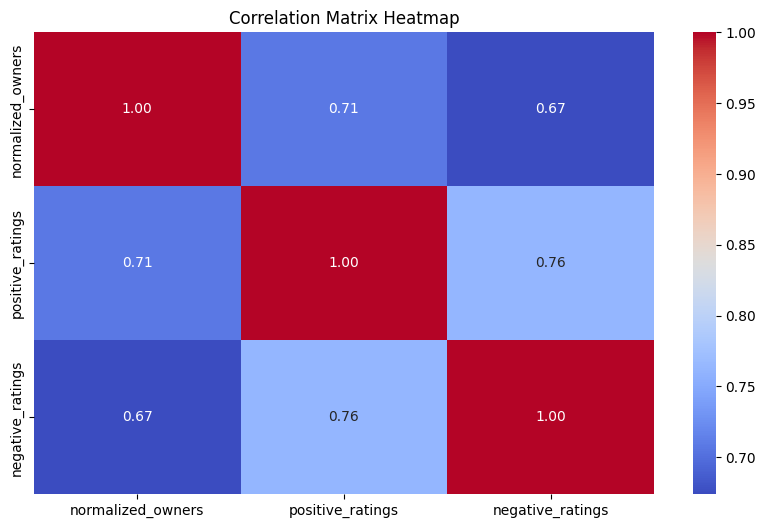

In [49]:
from sklearn.preprocessing import StandardScaler
# Normalize the 'middle_owners' column using StandardScaler
scaler = StandardScaler()
steam_df['normalized_owners'] = scaler.fit_transform(steam_df['middle_owners'].values.reshape(-1, 1))

# Correlation matrix
correlation_matrix = steam_df[['normalized_owners', 'positive_ratings', 'negative_ratings']].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


After analyzing the Steam Video Games dataset, we found a weak positive correlation between the number of owners (normalized) and both positive and negative ratings, suggesting that games with more owners tend to have slightly higher ratings. However, it's crucial to emphasize that correlation does not imply causation, and other factors likely influence these ratings. The relationship is not strong enough to establish a significant causal link between ownership and ratings. To draw more conclusive insights, further in-depth analysis and consideration of other variables are necessary, as the gaming industry's rating dynamics are likely influenced by multiple complex factors beyond ownership numbers.

## Analyze & Share

My analysis in Python uncovered top genres by rating, rising game prices over time, and most prolific publishers. 
I created data visualizations in Python using Matplotlib and Seaborn to share insights on genre ratings, prices over time, top publishers, and yearly releases.

### No.1: How have Steam game prices changed over time?
Look at price trends by year of release.

    year  price
0   1997  $5.99
1   1998  $7.19
2   1999  $3.99
3   2000  $5.59
4   2001   $2.0
5   2002  $7.99
6   2003  $2.99
7   2004  $5.76
8   2005  $4.03
9   2006  $7.56
10  2007  $5.63
11  2008  $6.54
12  2009  $6.99
13  2010  $7.39
14  2011  $7.53
15  2012  $8.59
16  2013  $8.69
17  2014  $7.46
18  2015  $6.42
19  2016  $5.89
20  2017  $5.89
21  2018  $5.57
22  2019  $6.19


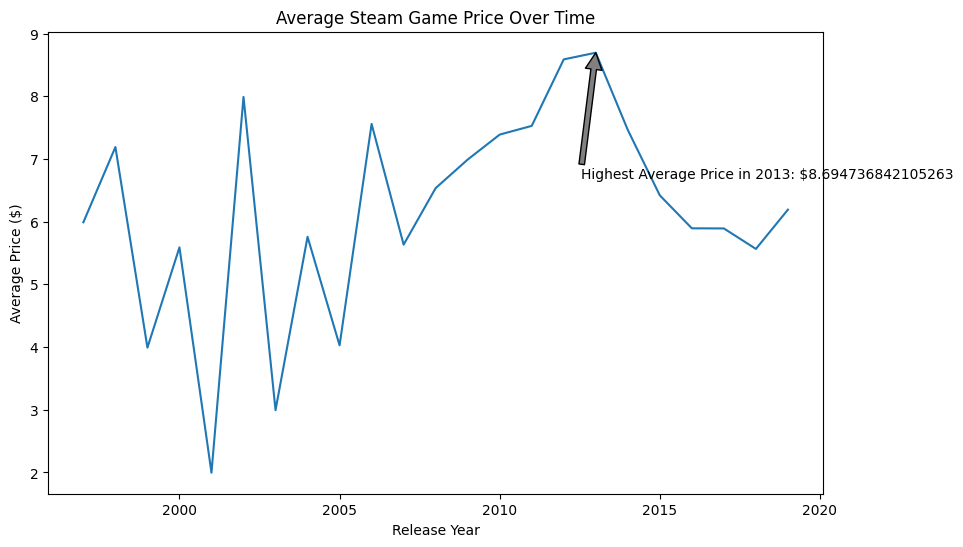

In [7]:
# Convert release_date to datetime, create year column
steam_df['release_date'] = pd.to_datetime(steam_df['release_date'])
steam_df['year'] = steam_df['release_date'].dt.year

# Group by year and calculate average price
price_by_year = steam_df.groupby('year')['price'].mean().reset_index()

# Create line plot of average price over time
plt.figure(figsize=(10,6))
sns.lineplot(data=price_by_year, x='year', y='price')

plt.xlabel('Release Year')
plt.ylabel('Average Price ($)')
plt.title('Average Steam Game Price Over Time')

# Annotate max price on plot
max_price_year = price_by_year['year'].iloc[price_by_year['price'].astype(float).idxmax()]
max_price = price_by_year['price'].astype(float).max()

plt.annotate(f'Highest Average Price in {max_price_year}: ${max_price}',

xy=(max_price_year, price_by_year['price'].astype(float).max()),
xytext=(max_price_year-0.45, price_by_year['price'].astype(float).max()-2),
arrowprops=dict(facecolor='grey'))

# Format data and print yearly averages
price_by_year['price'] = price_by_year['price'].apply(lambda x: '$'+str(round(x,2)))
print(price_by_year)


### Question No.2: Which publishers have the highest positive ratings? 
Analyze average user ratings by publisher.

                                               publisher  positive_ratings
8754                                    PUBG Corporation     496184.000000
10815                              Smartly Dressed Games     292574.000000
9405                                       Psyonix, Inc.     242561.000000
3208                                    Digital Extremes     226541.000000
12624                                              Valve     175689.066667
11312                                    Studio Wildcard     145035.000000
9690                                            Re-Logic     128107.000000
11062  Square Enix;Feral interactive (Mac);Feral Inte...     118634.000000
2474                                        ConcernedApe     118217.000000
3718                                  Endnight Games Ltd     110460.000000


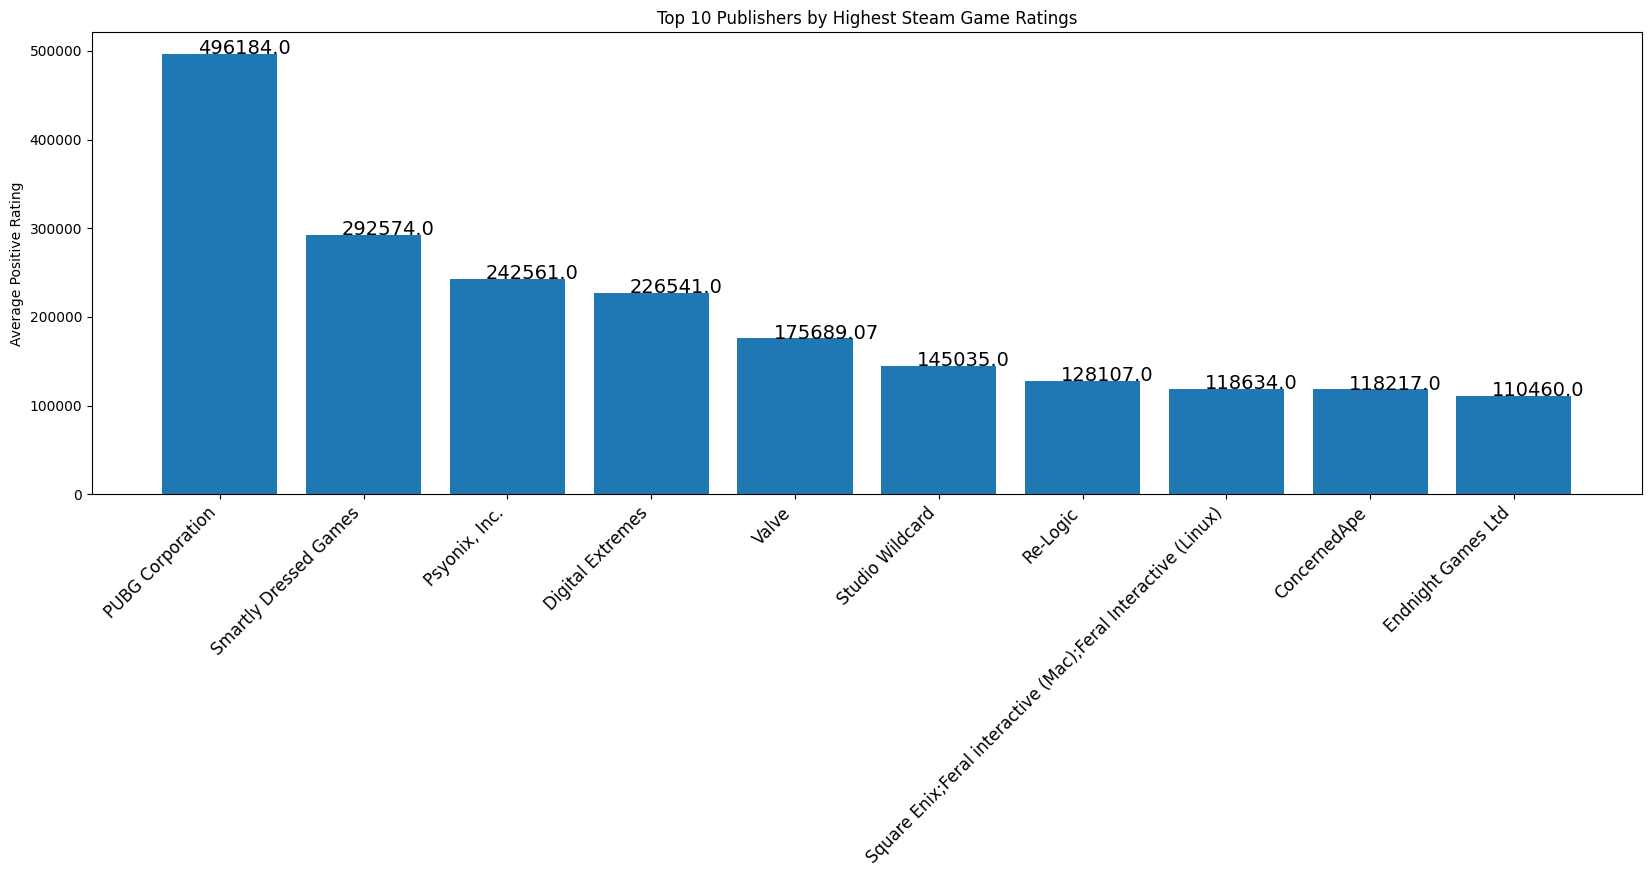

In [62]:
steam_df = steam_df[steam_df['publisher'].notnull()]

# Group by publisher and calculate the mean rating
publisher_ratings = steam_df.groupby('publisher')['positive_ratings'].mean().reset_index()

# Sort by the highest average rating
publisher_ratings = publisher_ratings.sort_values('positive_ratings', ascending=False)

# Print the top 10 publishers by average rating
print(publisher_ratings.head(10))

# Bar plot of the top 10 publishers
plt.figure(figsize=(20, 6))

ax = plt.subplot()
ax.bar(publisher_ratings['publisher'].head(10), publisher_ratings['positive_ratings'].head(10))
ax.set_ylabel('Average Positive Rating')
ax.set_title('Top 10 Publishers by Highest Steam Game Ratings')

# Add labels to bars
for i, v in enumerate(publisher_ratings['positive_ratings'].head(10)):
    ax.text(i - 0.15, v + 0.25, str(round(v, 2)), fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

### Question No.3: Do review scores differ by genre?
Compare average review scores for different game genres.

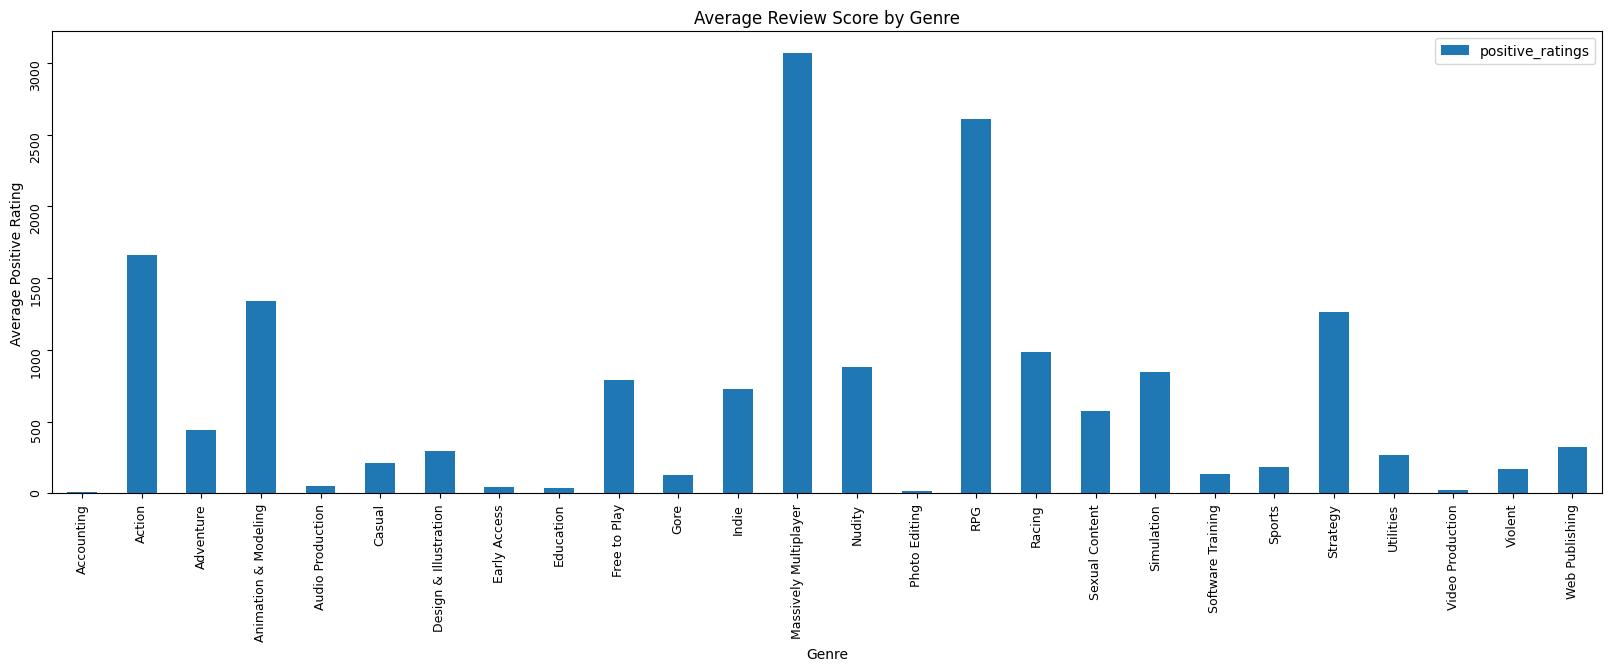

In [84]:
# Create genre column from list of genres
steam_df['genre'] = steam_df['genres'].apply(lambda x: x.split(';')[0])

# Calculate average review score for each genre
genre_scores = steam_df.groupby('genre')['positive_ratings'].mean().reset_index()

# Adjust figure size
plt.figure(figsize=(20, 6))

# Create axes explicitly
ax = plt.gca()

# Bar chart of average review score by genre
genre_scores.plot.bar(x='genre', y='positive_ratings', rot=0, title="Average Review Score by Genre", ax=ax)

ax.tick_params(rotation=90, labelsize=9)
ax.set_xlabel("Genre")
ax.set_ylabel("Average Positive Rating")

# Show the plot
plt.show()

### Question No.4: Do games with certain tags or descriptors tend to be more popular?
Analyze correlations between tags and user ratings/number of owners.

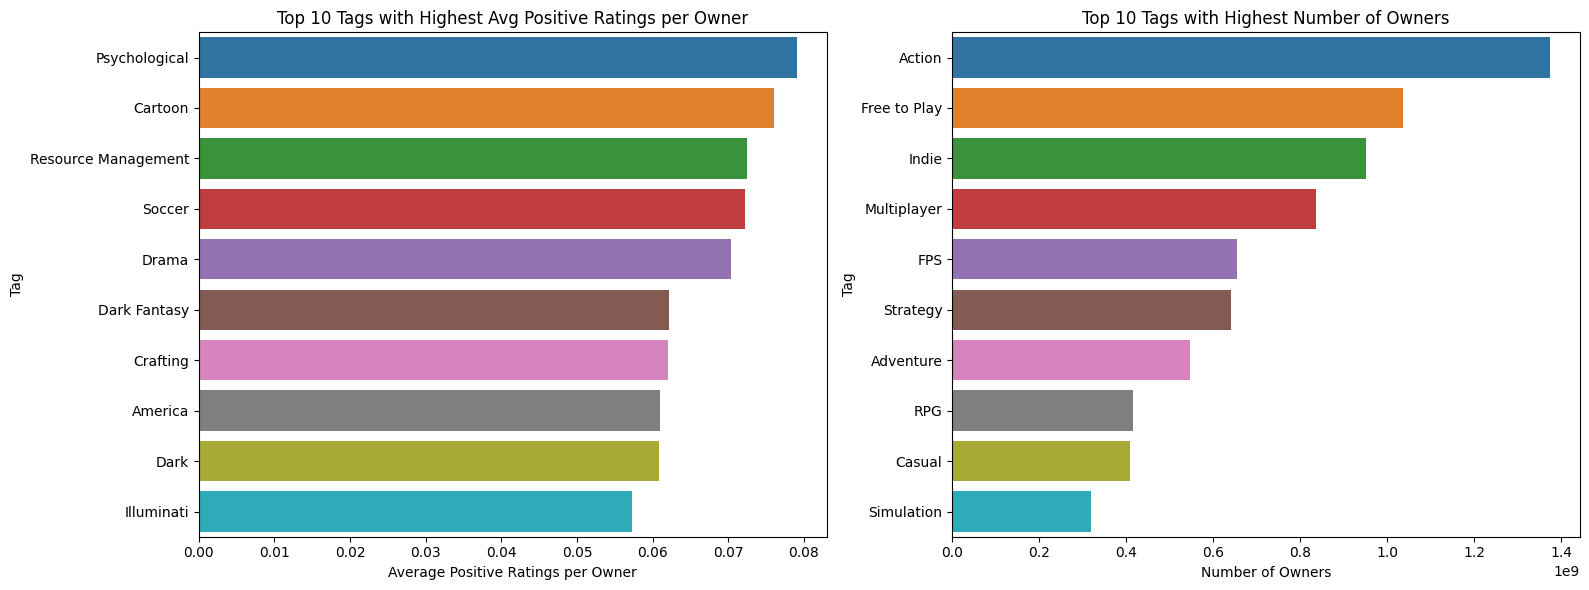

In [120]:
# Split and expand the 'steamspy_tags' column into separate tags
steam_df['tags'] = steam_df['steamspy_tags'].str.split(';')

# Create a list of all unique tags
all_tags = set(tag for tags in steam_df['tags'] for tag in tags)

# Create a dictionary to store the sum of positive ratings and middle owners for each tag
tag_stats = {}

# Calculate the sum of positive ratings and middle owners for each tag
for tag in all_tags:
    tag_stats[tag] = {
        'positive_ratings': steam_df[steam_df['tags'].apply(lambda x: tag in x)]['positive_ratings'].sum(),
        'middle_owners': steam_df[steam_df['tags'].apply(lambda x: tag in x)]['middle_owners'].sum()
    }

# Create a DataFrame from the tag statistics
tag_stats_df = pd.DataFrame.from_dict(tag_stats, orient='index').reset_index()
tag_stats_df = tag_stats_df.rename(columns={'index': 'tag'})

# Calculate the average positive ratings per average owner for each tag
tag_stats_df['average_positive_per_owner'] = tag_stats_df['positive_ratings'] / tag_stats_df['middle_owners']

# Select the top 10 tags with the highest average positive ratings per average owner
top_10_tags = tag_stats_df.nlargest(10, 'average_positive_per_owner')

# Create subplots to visualize the data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 10 tags with the highest average positive ratings per average owner
sns.barplot(x='average_positive_per_owner', y='tag', data=top_10_tags, ax=axes[0])
axes[0].set_title('Top 10 Tags with Highest Avg Positive Ratings per Owner')
axes[0].set_xlabel('Average Positive Ratings per Owner')
axes[0].set_ylabel('Tag')

# Plot 2: Top 10 tags with the highest sum of middle owners
top_10_owners = tag_stats_df.nlargest(10, 'middle_owners')
sns.barplot(x='middle_owners', y='tag', data=top_10_owners, ax=axes[1])
axes[1].set_title('Top 10 Tags with Highest Number of Owners')
axes[1].set_xlabel('Number of Owners')
axes[1].set_ylabel('Tag')

plt.tight_layout()
plt.show()

### Question No.5: Which platforms are most common for Steam games?
Look at frequency of different platforms like Windows, Mac, Linux.

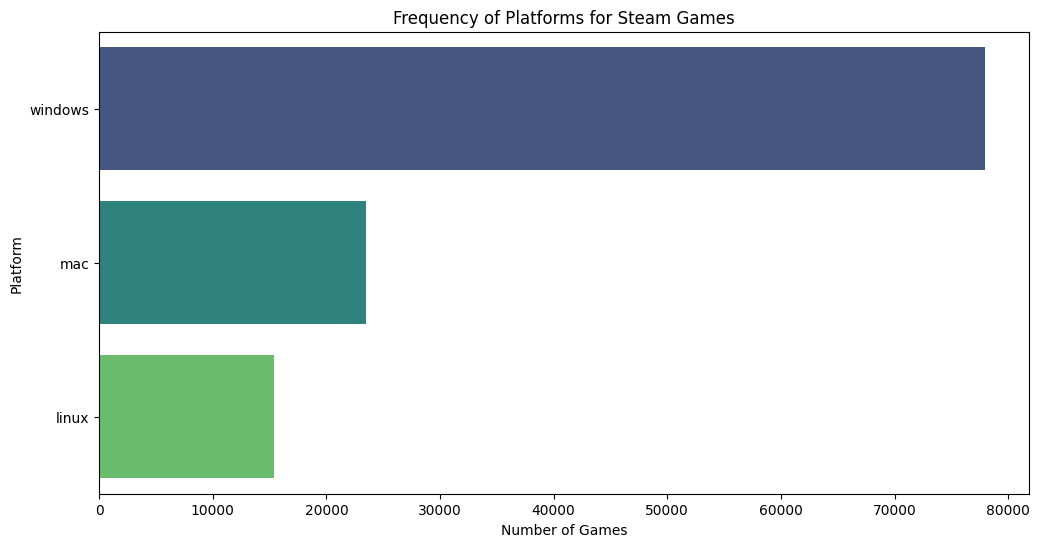

In [121]:
# Split and expand the 'platforms' column into separate platforms
steam_df['platforms'] = steam_df['platforms'].str.split(';')

# Create a list of all unique platforms
all_platforms = set(platform for platforms in steam_df['platforms'] for platform in platforms)

# Create a dictionary to store the frequency of each platform
platform_counts = {}

# Calculate the frequency of each platform
for platform in all_platforms:
    platform_counts[platform] = steam_df[steam_df['platforms'].apply(lambda x: platform in x)].shape[0]

# Create a DataFrame from the platform counts
platform_counts_df = pd.DataFrame.from_dict(platform_counts, orient='index', columns=['count']).reset_index()
platform_counts_df = platform_counts_df.rename(columns={'index': 'platform'})

# Sort the platforms by frequency in descending order
platform_counts_df = platform_counts_df.sort_values(by='count', ascending=False)

# Create a bar plot to visualize the platform frequencies
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='platform', data=platform_counts_df, palette='viridis')
plt.title('Frequency of Platforms for Steam Games')
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.show()

### Question No.6: What factors are associated with longer average playtimes for Steam games, and how do they impact a game's success and player engagement?
Analyze Genre, Publisher Impact, User Reviews

In [ ]:
# Convert 'average_playtime' to numeric (some values are in hours, others in minutes)
steam_df['average_playtime'] = steam_df['average_playtime'].astype(str)

def convert_playtime(playtime):
    if 'h' in playtime:
        return int(playtime.split('h')[0]) * 60
    elif 'm' in playtime:
        return int(playtime.split('m')[0])
    else:
        return 0

steam_df['average_playtime'] = steam_df['average_playtime'].map(convert_playtime)

# Question 1: Genre Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='average_playtime', data=steam_df)
plt.xticks(rotation=90)
plt.title('Average Playtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Playtime (minutes)')

plt.show()

# Question 2: Publisher Impact
plt.figure(figsize=(12, 6))
sns.barplot(x='publisher', y='average_playtime', data=steam_df.nlargest(10, 'average_playtime'))
plt.xticks(rotation=90)
plt.title('Top 10 Publishers with Longest Average Playtime')
plt.xlabel('Publisher')
plt.ylabel('Average Playtime (minutes)')

plt.show()

# Question 3: User Reviews
plt.figure(figsize=(12, 6))
sns.scatterplot(x='positive_ratings', y='average_playtime', data=steam_df)
plt.title('Average Playtime vs. Positive Ratings')
plt.xlabel('Positive Ratings')
plt.ylabel('Average Playtime (minutes)')

plt.show()

# Question 4: Multiplayer vs. Single Player
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_multiplayer', y='average_playtime', data=steam_df)
plt.title('Average Playtime for Multiplayer vs. Single Player Games')
plt.xlabel('Multiplayer')
plt.ylabel('Average Playtime (minutes)')

plt.show()

# Question 5: Game Features (DLCs)
plt.figure(figsize=(8, 6))
sns.boxplot(x='has_dlc', y='average_playtime', data=steam_df)
plt.title('Average Playtime for Games with DLCs vs. Without DLCs')
plt.xlabel('Has DLCs')
plt.ylabel('Average Playtime (minutes)')
plt.xticks([0, 1], ['No DLC', 'Has DLC'])

plt.show()

# Question 6: Release Year Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='average_playtime', data=steam_df)
plt.title('Average Playtime Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Playtime (minutes)')

plt.show()

# Question 7: Platform Impact
plt.figure(figsize=(10, 6))
sns.boxplot(x='platforms', y='average_playtime', data=steam_df)
plt.title('Average Playtime by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Playtime (minutes)')
plt.xticks(rotation=90)

plt.show()


# Conclusion

**Act**

In conclusion, analyzing Steam data provides valuable insights around optimal games to develop and promote on the platform. I recommend focusing on high quality role playing games. Additional data could include critic reviews and seasonal sales.

Let me know if you would like me to modify or expand this Python-focused case study description. I'm happy to tailor it further based on your specific project needs.